In [16]:
%run My_Library.ipynb

In [17]:
import pandas as pd


# Function for finding derivative of a function at given x

def deriv(f,x):
    h=10**-7
    fd=(f(x+h)-f(x))/h # Derivative algorithm
    return fd



# Function for finding double derivative of a function at given x

def doub_deriv(f,x):
    h=10**-7
    fdd=(f(x+h)+f(x-h)-2*f(x))/(2*h) # Double derivative algorithm
    return fdd

In [18]:
# Function for bracketing the root 
# the algorithm changes the intervals towards lower value among f(a) and f(b)

def bracketing(a,b,f):
    scale=0.5 # defining scaling factor for changing the interval
        
    while f(a)*f(b)>0:
        if abs(f(a)) <= abs(f(b)):
            a = a - scale*(b-a)
        else:
            b = b + scale*(b-a)
    return a,b



# Function for finding root using bisection method i.e. c=(a+b)/2

def bisection(a,b,f):
    # Checking if root is landed by default - really lucky
    if f(a)*f(b)==0.0:
        if f(a)==0.0:
            return a
        else:
            return b

    c=(a+b)/2
    while (b-a)/2>eps: # checking if the accuracy is achieved
        c=(a+b)/2
        if (f(a)*f(c))<=0.0: # Check if the root is properly bracketted
            b=c
        else:
            a=c
    return (a+b)/2



# Same bisection function but this gives arrays instead of roots for plotting purpose

def bisection_for_plotting(a,b,f):
    loop_count=[]
    lc=0
    loop_value=[]

    # Checking if root is landed by default - really lucky
    if f(a)*f(b)==0:
        lc+=1
        loop_count.append(lc)
        loop_value.append(eps)
        if f(a)==0:
            return a
        else:
            return b

    c=(a+b)/2
    while (b-a)/2>eps: # checking if the accuracy is achieved
        lc+=1
        c=(a+b)/2
        if (f(a)*f(c))<=0: # Check if the root is properly bracketted
            b=c
        else:
            a=c
        loop_count.append(lc)
        loop_value.append(f((b+a)/2))
    return loop_count, loop_value



# Function for finding root using regula-falsi method i.e. c=b-(b-a)*f(b)/(f(b)-f(a))

def regula_falsi(a,b,f):
    # Checking if root is landed by default - really lucky
    if f(a)*f(b)==0:
        if f(a)==0:
            return a
        else:
            return b

    c=(b-a)/2
    cn=b-a
    while abs(c-cn)>eps: # checking if the accuracy is achieved
        cn=c
        c=b-(b-a)*f(b)/(f(b)-f(a))
        if (f(a)*f(c))<=0: # Check if the root is properly bracketted
            b=c
        else:
            a=c
    return c



# Same bisection function but this gives arrays instead of roots for plotting purpose

def regula_falsi_for_plotting(a,b,f):
    loop_count=[]
    lc=0
    loop_value=[]

    # Checking if root is landed by default - really lucky
    if f(a)*f(b)==0:
        lc+=1
        loop_count.append(lc)
        loop_value.append(eps)
        if f(a)==0:
            return a
        else:
            return b

    c=(b-a)/2
    cn=b-a
    while abs(c-cn)>eps: # checking if the accuracy is achieved
        lc+=1
        cn=c
        c=b-(b-a)*f(b)/(f(b)-f(a))
        if (f(a)*f(c))<=0: # Check if the root is properly bracketted
            b=c
        else:
            a=c
        loop_count.append(lc)
        loop_value.append(f(c))
    return loop_count, loop_value



# Function for finding root using newton-raphson method i.e. x=x-f(x)/deriv(f,x)
# when given a guess solution x far from extrema

def newton_raphson(x,f):
    xn=x
    x=x-f(x)/deriv(f,x)
    while abs(x-xn)>eps: # checking if the accuracy is achieved
        xn=x
        x=x-f(x)/deriv(f,x)
    return x



# Same newton-raphson function but this gives arrays instead of roots for plotting purpose

def newton_raphson_for_plotting(x,f):
    loop_count=[]
    lc=0
    loop_value=[]
    xn=x
    x=x-f(x)/deriv(f,x)
    while abs(x-xn)>eps: # checking if the accuracy is achieved
        lc+=1
        xn=x
        x=x-f(x)/deriv(f,x)
        loop_count.append(lc)
        loop_value.append(f(x))
    return loop_count, loop_value


In [19]:
# Functions for laguerre method


# Function to give the polynomial given coefficient array

def poly_function(x,A):
    n=len(A)
    s=0
    for i in range(n):
        s+=A[i]*x**(n-1-i)
    return s



# Function for finding first derivative of a polynomial function at given x and coefficients saved in array A

def first_deriv_poly(x,A):
    h=10**(-6)
    fd=(poly_function(x+h,A)-poly_function(x-h,A))/(2*h)  # Derivative algorithm
    return fd



# Function for finding second derivative of a polynomial function at given x and coefficients saved in array A

def second_deriv_poly(x,A):
    h = 10**(-6)
    # Double derivative algorithm
    sd = (poly_function(x+h,A) + poly_function(x-h,A) -2*poly_function(x,A)) / (2*h**2)
    return sd



# Function for synthetic division - deflation
# it works simply the sythetic division way, the ouptput coefficients are stored in array C

def deflate(sol, A):
    n=len(A)
    B=[0 for i in range(n)]
    C=[0 for i in range(n-1)]
    C[0]=A[0]
    for i in range(n-1):
        B[i+1]=C[i]*sol
        if i!=n-2:
            C[i+1]=A[i+1]+B[i+1]
    return C



def laguerre(poly_function, first_deriv_poly, second_deriv_poly, A, guess):
    n = len(A)
    if n != 2:
        j = guess
        j1, j2 = guess, 0
        k = 1
        if poly_function(guess, A) != 0:
            while abs(j2 - j1) > eps and k<100:
                G = first_deriv_poly(j,A) / poly_function(j,A)

                H = G**2 - (second_deriv_poly(j,A) / poly_function(j,A))
                F = (n-1)*(n*H - G**2)

                deno1 = G + math.sqrt(F)
                deno2 = G - math.sqrt(F)
                if abs(deno1) > abs(deno2):
                    j= n/deno1
                else:
                    j= n/deno2

                if k % 2 == 0:
                    j1 = j2-j
                    j = j1
                else:
                    j2 = j1 - j
                    j = j2
                k += 1
        if k % 2 == 0:
            A = deflate(ROUND(j1,8), A)
            return A,ROUND(j1,8)
        else:
            A = deflate(ROUND(j2,8), A)
            return A,ROUND(j2,8)
    else:
        return A, -A[1]


In [20]:
#Q1
def f1(x):
    return math.log(x/2)-math.sin(5*x/2)

eps=10**-6

p=1.6
q=2.4
a,b=bracketing(p,q,f1)

print("\nBISECTION METHOD")
root=bisection(a,b,f1)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))

print("\nREGULA FALSI METHOD")
root=regula_falsi(a,b,f1)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))



BISECTION METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (1.6,2.8)
Root of the given function in the interval (1.6,2.8) is 2.6231401443481444

REGULA FALSI METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (1.6,2.8)
Root of the given function in the interval (1.6,2.8) is 2.623140335562578



BISECTION METHOD
               0
1   2.563228e-01
2  -5.378489e-02
3   9.899938e-02
4   2.163208e-02
5  -1.637031e-02
6   2.563625e-03
7  -6.920938e-03
8  -2.182958e-03
9   1.892705e-04
10 -9.971110e-04
11 -4.039869e-04
12 -1.073749e-04
13  4.094363e-05
14 -3.321666e-05
15  3.863228e-06
16 -1.467678e-05
17 -5.406793e-06
18 -7.717864e-07
19  1.545720e-06
20  3.869665e-07


REGULA FALSI METHOD
              0
1  5.587359e-01
2 -2.562513e-02
3 -3.458458e-04
4 -3.141021e-06
5 -2.834117e-08
6 -2.557048e-10


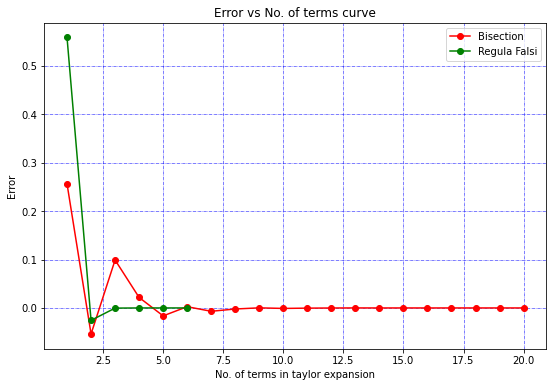

In [24]:
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

p=1.6
q=2.4

a,b=bracketing(p,q,f1)
x_bis, y_bis =bisection_for_plotting(a,b,f1)
x_rf, y_rf =regula_falsi_for_plotting(a,b,f1)

print("\nBISECTION METHOD")
a=pd.DataFrame(y_bis,x_bis)
print(a)
print("\n\nREGULA FALSI METHOD")
b=pd.DataFrame(y_rf,x_rf)
print(b)

plt.plot(x_bis, y_bis, 'r-o', label='Bisection')
plt.plot(x_rf, y_rf, 'g-o', label='Regula Falsi')

plt.grid(color='b', ls = '-.', lw = 0.5)
plt.xlabel('No. of terms in taylor expansion')
plt.ylabel('Error')
plt.title('Error vs No. of terms curve')
plt.legend()
plt.show()


In [30]:
#Q2
def f2(x):
    return -1*math.cos(x)-x

eps=10**-6

p=1.6
q=2.4
a,b=bracketing(p,q,f2)

print("\nBISECTION METHOD")
root=bisection(a,b,f2)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))

print("\nREGULA FALSI METHOD")
root=regula_falsi(a,b,f2)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))

print("\nNEWTON RAPHSON METHOD")
x=0
root=newton_raphson(x,f2)
print("Nearest root of the given function for the given value of x = " + str(x) + " is = "+str(root))



BISECTION METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (-1.649999999999999,2.4)
Root of the given function in the interval (-1.649999999999999,2.4) is -0.7390854477882378

REGULA FALSI METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (-1.649999999999999,2.4)
Root of the given function in the interval (-1.649999999999999,2.4) is -0.7390850325361019

NEWTON RAPHSON METHOD
Nearest root of the given function for the given value of x = 0 is = -0.7390851332151607


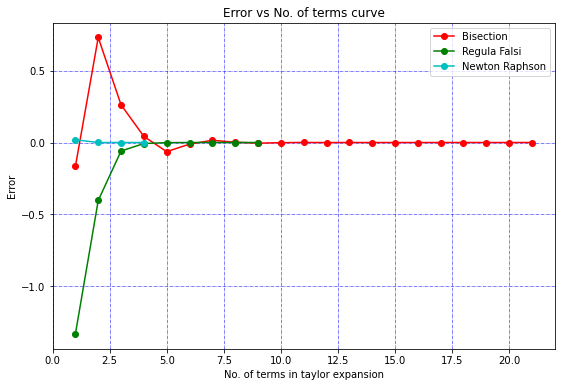


BISECTION METHOD
               0
1  -1.660862e-01
2   7.295658e-01
3   2.616988e-01
4   4.203121e-02
5  -6.355741e-02
6  -1.113527e-02
7   1.535626e-02
8   2.087398e-03
9  -4.529730e-03
10 -1.222612e-03
11  4.320316e-04
12 -3.953807e-04
13  1.830287e-05
14 -1.885446e-04
15 -8.512226e-05
16 -3.341005e-05
17 -7.553678e-06
18  5.374573e-06
19 -1.089558e-06
20  2.142506e-06
21  5.264733e-07


REGULA FALSI METHOD
              0
1 -1.329944e+00
2 -4.027049e-01
3 -5.925905e-02
4 -7.232773e-03
5 -8.590699e-04
6 -1.016972e-04
7 -1.203423e-05
8 -1.423991e-06
9 -1.684977e-07


NEWTON RAPHSON METHOD
              0
1  1.892307e-02
2  4.645548e-05
3  2.836879e-10
4  0.000000e+00


In [31]:
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

p=1.6
q=2.4
x=0
a,b=bracketing(p,q,f2)

x_bis, y_bis =bisection_for_plotting(a,b,f2)
x_rf, y_rf =regula_falsi_for_plotting(a,b,f2)
x_nr, y_nr =newton_raphson_for_plotting(x,f2)

plt.plot(x_bis, y_bis, 'r-o', label='Bisection')
plt.plot(x_rf, y_rf, 'g-o', label='Regula Falsi')
plt.plot(x_nr, y_nr, 'c-o', label='Newton Raphson')

plt.grid(color='b', ls = '-.', lw = 0.5)
plt.xlabel('No. of terms in taylor expansion')
plt.ylabel('Error')
plt.title('Error vs No. of terms curve')
plt.legend()
plt.show()

print("\nBISECTION METHOD")
a=pd.DataFrame(y_bis,x_bis)
print(a)
print("\n\nREGULA FALSI METHOD")
b=pd.DataFrame(y_rf,x_rf)
print(b)
print("\n\nNEWTON RAPHSON METHOD")
c=pd.DataFrame(y_nr,x_nr)
print(c)


In [34]:
#Q3
coeff=[1,0,-5,0,4]
n=len(coeff)
guess = 1.4

print("Solutions of the polynomial equation are:")
for i in range(n-1):
    coeff, root = laguerre(poly_function, first_deriv_poly, second_deriv_poly, coeff, guess)
    print(root)

Solutions of the polynomial equation are:
1.0
2.0
-1.0
-2.0
